Question 1

In [1]:
import cv2 as cv
vidcap = cv.VideoCapture(r'/Users/vaishnaviveeranki/Desktop/asst2/video.mp4')
check,image = vidcap.read()
count = 0
inc=0
while check:
    check,image = vidcap.read()
    if count%30==0 : 
      inc+=1
      image=cv.flip(image,0)
      cv.imwrite(r"/Users/vaishnaviveeranki/Desktop/asst2\data\frame%d.jpg" % inc, image)         
    count += 1
    
print(count)

342


Ques-1A-- Canny edge

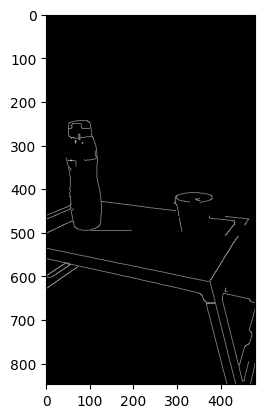

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread(r'/Users/vaishnaviveeranki/Desktop/asst2\data\frame8.jpg',0)
edges = cv.Canny(img,100,200)
plt.imshow(edges,cmap='gray')

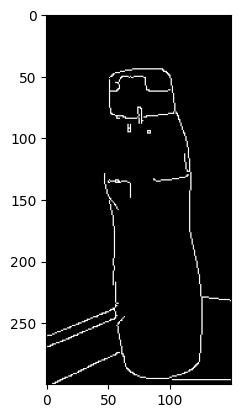

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread(r'/Users/vaishnaviveeranki/Desktop/asst2\data\frame8.jpg',0)
img1=img[200:500,0:150]
edges = cv.Canny(img1,100,200)
plt.imshow(edges,cmap='gray')

1A) Corner detection

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
filename = r'/Users/vaishnaviveeranki/Desktop/asst2\data\frame8.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.07)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
#cv.imshow('dst',img)
cv.imwrite('/Users/vaishnaviveeranki/Desktop/asst2\data\corner_harris.jpg',img)


True

Ques-1B) Homography matrix

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
img1 = cv.imread(r'/Users/vaishnaviveeranki/Desktop/asst2\data\frame8.jpg',0)  
img2 = cv.imread(r'/Users/vaishnaviveeranki/Desktop/asst2\data\frame6.jpg',0)
sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

In [6]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
    print("Homography Matrix")
    print(M)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

Homography Matrix
[[ 1.01995099e+00  1.69404294e-02 -1.31606780e+02]
 [-5.14625025e-03  9.88778160e-01  4.82736054e+00]
 [ 9.05361408e-05 -2.52024285e-05  1.00000000e+00]]


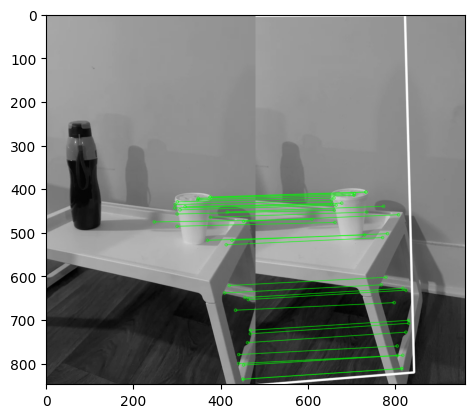

In [7]:
draw_params = dict(matchColor = (0,255,0), 
                   singlePointColor = None,
                   matchesMask = matchesMask, 
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
cv.imwrite(r'Users/vaishnaviveeranki/Desktop/asst2/matching_of_2_frames.jpg',img3)
plt.imshow(img3, 'gray')
#plt.show()

Question-2--image stiching

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [9]:
import cv2
def pan_stich(image_paths,output_loc):

    imgs = []

    for i in range(len(image_paths)):
        imgs.append(cv2.imread(image_paths[i]))
        imgs[i]=cv2.resize(imgs[i],(0,0),fx=0.4,fy=0.4)

    stitchy=cv2.Stitcher.create()
    (dummy,output)=stitchy.stitch(imgs)

    if dummy != cv2.STITCHER_OK:
        print("stitching ain't successful")
    else:
        print('Your Panorama is ready!!!')

    # final output
    cv2.imwrite(output_loc+'/out4.jpg',output)


In [10]:
loc=r'/Users/vaishnaviveeranki/Desktop/asst2'
image_paths=['/Users/vaishnaviveeranki/Desktop/asst2/set1/bookstore1.jpg','/Users/vaishnaviveeranki/Desktop/asst2/set1/bookstore2.jpg','/Users/vaishnaviveeranki/Desktop/asst2/set1/bookstore3.jpg']
image_dest=r'/Users/vaishnaviveeranki/Desktop/asst2'
pan_stich(image_paths,image_dest)

Your Panorama is ready!!!


In [11]:
loc=r'/Users/vaishnaviveeranki/Desktop/asst2'
image_paths=['/Users/vaishnaviveeranki/Desktop/asst2/set2/bookstore5.jpg','/Users/vaishnaviveeranki/Desktop/asst2/set2/bookstore6.jpg','/Users/vaishnaviveeranki/Desktop/asst2/set2/bookstore7.jpg']
image_dest=r'/Users/vaishnaviveeranki/Desktop/asst2'
pan_stich(image_paths,image_dest)

Your Panorama is ready!!!


In [12]:
loc=r'/Users/vaishnaviveeranki/Desktop/asst2'
image_paths=['/Users/vaishnaviveeranki/Desktop/asst2/set3/TDeck_team06_1.jpeg','/Users/vaishnaviveeranki/Desktop/asst2/set3/TDeck_team06_2.jpeg','/Users/vaishnaviveeranki/Desktop/asst2/set3/TDeck_team06_3.jpeg']
image_dest=r'/Users/vaishnaviveeranki/Desktop/asst2'
pan_stich(image_paths,image_dest)

Your Panorama is ready!!!


In [13]:
loc=r'/Users/vaishnaviveeranki/Desktop/asst2'
image_paths=['/Users/vaishnaviveeranki/Desktop/asst2/set4/classroom_south1.jpg','/Users/vaishnaviveeranki/Desktop/asst2/set4/classroom_south2.jpg','/Users/vaishnaviveeranki/Desktop/asst2/set4/classroom_south3.jpg']
image_dest=r'/Users/vaishnaviveeranki/Desktop/asst2'
pan_stich(image_paths,image_dest)

Your Panorama is ready!!!


In [15]:
loc=r'/Users/vaishnaviveeranki/Desktop/asst2'
image_paths=['/Users/vaishnaviveeranki/Desktop/asst2/set5/urbanlife1.jpg','/Users/vaishnaviveeranki/Desktop/asst2/set5/urbanlife2.jpg','/Users/vaishnaviveeranki/Desktop/asst2/set5/urbanlife3.jpg']
image_dest=r'/Users/vaishnaviveeranki/Desktop/asst2'
pan_stich(image_paths,image_dest)

Your Panorama is ready!!!


Question-3-- integral matrix

In [16]:
import cv2
import depthai as dai
import numpy as np
from copy import deepcopy


In [17]:
img = cv2.imread(r'/Users/vaishnaviveeranki/Desktop/asst2\data\frame8.jpg')
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# initialising to 0
intergal_img = [[0 for j in range(len(img_bw[0]))] for i in range(len(img_bw))]

# compying values form img array
for i in range(len(img_bw)):
    for j in range(len(img_bw[0])):
        intergal_img[i][j] = int(img_bw[i][j])

# calculating the integral img
for i in range(1, len(img_bw[0])):
    intergal_img[0][i] += intergal_img[0][i-1] 

for j in range(1, len(img_bw)):
    intergal_img[j][0] += intergal_img[j-1][0]
    
for i in range(1, len(img_bw)):
    for j in range(1, len(img_bw[0])):
        intergal_img[i][j] = intergal_img[i-1][j] + intergal_img[i][j-1] - intergal_img[i-1][j-1] + img_bw[i][j]

In [18]:
# saving integral image in file

a = np.array(intergal_img)
mat = np.matrix(a)

with open('integral_matrix.txt','wb') as f:
    for line in mat:
        np.savetxt(f, line, fmt="%d")


Question-4--SIFT

In [19]:
import cv2
import numpy as np
import sys

class Image_Stitching():
    def __init__(self,soro) :
        self.ratio=0.85
        self.min_match=10
        if soro=="SIFT":
          self.soro=cv2.SIFT_create()
        else:
          self.soro=cv2.ORB_create()
        self.smoothing_window_size=800

    def registration(self,img1,img2):
        kp1, des1 = self.soro.detectAndCompute(img1, None)
        kp2, des2 = self.soro.detectAndCompute(img2, None)
        matcher = cv2.BFMatcher()
        raw_matches = matcher.knnMatch(des1, des2, k=2)
        good_points = []
        good_matches=[]
        for m1, m2 in raw_matches:
            if m1.distance < self.ratio * m2.distance:
                good_points.append((m1.trainIdx, m1.queryIdx))
                good_matches.append([m1])
        img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good_matches, None, flags=2)
        cv2.imwrite('matching.jpg', img3)
        if len(good_points) > self.min_match:
            image1_kp = np.float32(
                [kp1[i].pt for (_, i) in good_points])
            image2_kp = np.float32(
                [kp2[i].pt for (i, _) in good_points])
            H, status = cv2.findHomography(image2_kp, image1_kp, cv2.RANSAC,5.0)
        return H

    def create_mask(self,img1,img2,version):
        height_img1 = img1.shape[0]
        width_img1 = img1.shape[1]
        width_img2 = img2.shape[1]
        height_panorama = height_img1
        width_panorama = width_img1 +width_img2
        offset = int(self.smoothing_window_size / 2)
        barrier = img1.shape[1] - int(self.smoothing_window_size / 2)
        mask = np.zeros((height_panorama, width_panorama))
        if version== 'left_image':
            mask[:, barrier - offset:barrier + offset ] = np.tile(np.linspace(1, 0, 2 * offset ).T, (height_panorama, 1))
            mask[:, :barrier - offset] = 1
        else:
            mask[:, barrier - offset :barrier + offset ] = np.tile(np.linspace(0, 1, 2 * offset ).T, (height_panorama, 1))
            mask[:, barrier + offset:] = 1
        return cv2.merge([mask, mask, mask])

    def blending(self,img1,img2):
        H = self.registration(img1,img2)
        height_img1 = img1.shape[0]
        width_img1 = img1.shape[1]
        width_img2 = img2.shape[1]
        height_panorama = height_img1
        width_panorama = width_img1 +width_img2

        panorama1 = np.zeros((height_panorama, width_panorama, 3))
        mask1 = self.create_mask(img1,img2,version='left_image')
        panorama1[0:img1.shape[0], 0:img1.shape[1], :] = img1
        panorama1 *= mask1
        mask2 = self.create_mask(img1,img2,version='right_image')
        panorama2 = cv2.warpPerspective(img2, H, (width_panorama, height_panorama))*mask2
        result=panorama1+panorama2

        rows, cols = np.where(result[:, :, 0] != 0)
        min_row, max_row = min(rows), max(rows) + 1
        min_col, max_col = min(cols), max(cols) + 1
        final_result = result[min_row:max_row, min_col:max_col, :]
        return final_result

In [21]:
img1 = cv2.imread(r'/Users/vaishnaviveeranki/Desktop/asst2/set1/bookstore1.jpg')
img2 = cv2.imread(r'/Users/vaishnaviveeranki/Desktop/asst2/set1/bookstore3.jpg')
final=Image_Stitching("SIFT").blending(img1,img2)
cv2.imwrite(r'/Users/vaishnaviveeranki/Desktop/asst2/set1/panaroma.jpg', final)

True

question-5--ORB features

In [ ]:
img1 = cv2.imread(r'/Users/vaishnaviveeranki/Desktop/asst2/set2/bookstore6.jpg')
img2 = cv2.imread(r'/Users/vaishnaviveeranki/Desktop/asst2/set2/bookstore7.jpg')
final=Image_Stitching("ORB").blending(img1,img2)
cv2.imwrite(r'/Users/vaishnaviveeranki/Desktop/asst2/set2/panaroma.jpg', final)

True